# Welcome to k-means!
In this jupyter notebook, I will walk through my implementation of k-means using the spotify data and compare it to the built in methods from sklearn. 
Let's start importing! I am importing some packages for data manipulation, visualization, and the sklearn implementation of kmeans. 

In [1]:
# Package Import block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random
from scipy.spatial import distance 
from sklearn.cluster import KMeans

The raw dataset contains the variables for each song and whether or not the user liked them. Because k-means is unsupervised, we need to take out the column that has whether or not the user liked the song. In order to graph our clusters, it would also be useful to have our data in two dimensions. I am going to pick two variables out of the data: acousticness and energy. These variables will be the only variables we use to classify the data. Let's get the data ready!

In [2]:
# Import Data
song_pd = pd.read_csv("data.csv", sep = ",")
song_numpy = song_pd.to_numpy()

#Picking out acousticness and energy columns and removing the answer
song_justtwo = song_pd[['acousticness', 'energy']]
song_justtwo_numpy = song_justtwo.to_numpy()

#Look at what we got! 
song_justtwo.head()


,acousticness,energy
0,0.001100,0.904
1,0.000176,0.846
2,0.955000,0.199
3,0.054200,0.763
4,0.171000,0.829


To benefit the graphs we draw at the end of this notebook and to ensure we have neat clusters, we should ensure that the data is normalized. This means that each value for acousticness and energy is between 0 and 1. However, all the values for acousticnes and energy are already between 0 and 1. So, we are not going to normalize the data. 

Now we have a numpy array of each song without information on whether or not the user liked it. It is time to classify the data! Classifying the data, in this context, means splitting the data into two groups: liked and disliked. We will first use my implementation of k-means. 

In [3]:
def my_kmeans(data, k, rand_state):
    """
    input: data as a numpy array, k value as int, rand_state as int
    output: cluster labels and cluster centers as tuple
    """

    #count items in the dataframe
    index = pd.DataFrame(range(len(data)))
    #initialize starting clusters by taking random sample
    initial_center = index.sample(k, random_state=rand_state)
    
    cluster_centers = data[initial_center[0]]
    
    for a in range(0,100):
        #calculate distance from each point to the centers
        dists = distance.cdist(data, cluster_centers, 'euclidean') 
        #find the index of the smallest distance for each datapoint
        cluster_labels = np.argmin(dists, axis=1) 
        #loop through each cluster
        for i in range(0,k):
            # select all points in that cluster
            inds = cluster_labels == i
            cluster = data[inds]
            
            #initialize means
            x_mean = 0
            y_mean = 0

            #find sum for each cluster
            for j in range(len(cluster)):
                x_mean += cluster[j,0]
                y_mean += cluster[j,1]

            #compute averages for each cluster
            x_mean = x_mean / len(cluster)
            y_mean = y_mean / len(cluster)

            #assign cluster centers based on what point all the points in the cluster are closest to
            cluster_centers[i][0] = x_mean
            cluster_centers[i][1] = y_mean
                
    
    return (cluster_centers, cluster_labels)

We can use the algorithm above on our data:

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

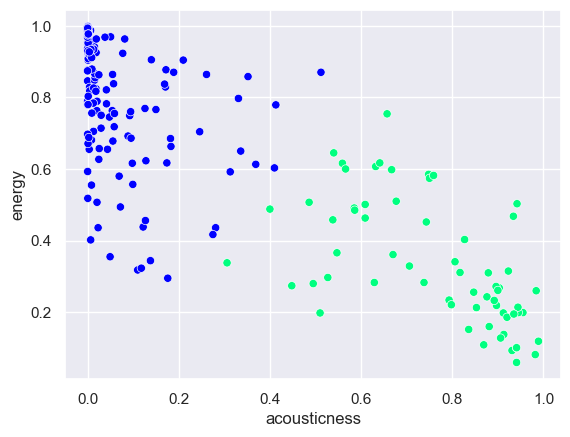

In [4]:
#running kmeans algorithm
cluster_data = my_kmeans(song_justtwo_numpy, 2, 2)

df = pd.DataFrame(song_justtwo_numpy, columns = ['acousticness','energy'])
kmeans_result = sns.scatterplot(x="acousticness", y="energy", data=df, c = cluster_data[1], cmap = 'winter') 
kmeans_result

Looking at the graph above, we can see that the kmeans algorithm did a really clean job of splitting the data into clusters. There is not a lot of overlap between the datapoints. There are some limitations to this graph. Because we reduced the data, we dropped a lot of potentially valuable information contained in other variables. Another option could be to normalize each variable in the dataframe, and perform a dimension reduction. This would make the 7-dimension dataset into a 2-dimension dataset. This would make it hard to provide meaningful labels for the x and y axis but it could result in more accurate clusters. 

Next, we can explore the built in version for k-means. 

In [5]:
# Run built-in kmeans algorithm
km_alg= KMeans(n_clusters=2, init="random",random_state = 1, max_iter = 200)

# Fit model to the data
fit = km_alg.fit(song_justtwo_numpy)

We can plot the results of the model below. Notice there is a color for liked and disliked classification, as well as the cneter of each cluster.

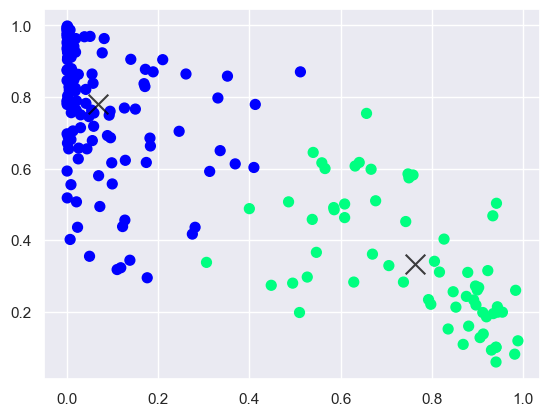

In [6]:
# Plot the results
labels = fit.labels_ 
centers = fit.cluster_centers_

# Plot and color the points according to their label
plt.scatter(song_justtwo_numpy[:,0], song_justtwo_numpy[:,1], c=labels, s=50, cmap="winter")
# Add the cluster centers on top
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker="x", s=200, alpha=0.75)


Comparing my implementation with the built in implementation, we can see that the clusters are very similiar. The limitations for the two plots are similar. Now that we have explored the k-means classification, let's view the actual classification of the data. We can color each of the points based on the 0 or 1 value in the last column of the original dataset. 

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

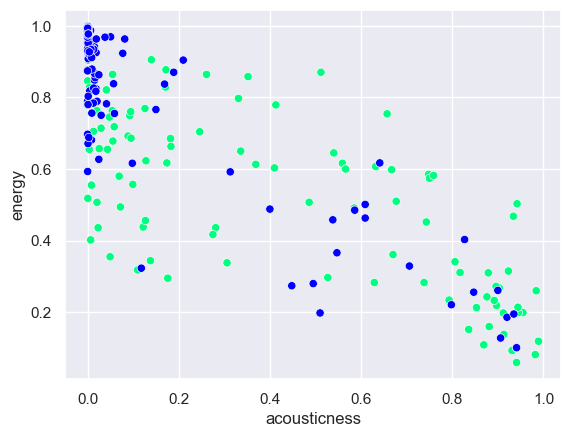

In [7]:
actual = sns.scatterplot(x="acousticness", y="energy", data=df, c = song_numpy[:,-1], cmap = 'winter') 
actual

Viewing the plot above in comparision with the other plots, we can see that there are a lot of classification errors for each implementation of k-means. We can formalize this error by evaluating the performance of the k-means sklearn implementation with the actual values of the data. Below, we calculate the 

In [8]:
preds = labels 
true_int = song_numpy[:,-1].astype(int)
#make a numpy array of true/false depending of whether the truth and prediction were different
nonequal = np.not_equal(preds, true_int)

#sum where all nonequal values are True, counting total errors
total_errors = nonequal.sum()
print("We made", total_errors, "errors classifyiing the data.")

total_correct = 195-117
print("We correctly classified", total_correct, "songs in the dataset.")

proportion_correct = total_correct/195
print("We correctly classified", proportion_correct, "of the dataset.")



We made 74 errors classifyiing the data.
We correctly classified 78 songs in the dataset.
We correctly classified 0.4 of the dataset.


We can see above a summary of our classification with k-means. We found that our k-means model is correct 40% of the time. We can do so much better! Let's look at some more models in the next section and see if we can increase the percentage. 